In [107]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [108]:
##impor some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [109]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
## divide the dataset into independent and dependent features

X=dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [111]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [112]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [113]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [114]:
X=X.drop(['Geography','Gender'],axis=1)

In [115]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [116]:
X=pd.concat([X,geography,gender],axis=1)

In [117]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [118]:
## splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [119]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [120]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [121]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [122]:
X_train.shape

(8000, 11)

In [123]:
## Part 2 Now let's create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [124]:
### lets initialize the ANN
classifier=Sequential()

In [125]:
## adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [126]:
## adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [127]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [128]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [129]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [130]:
## early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [131]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [132]:

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 5s 4ms/step - loss: 0.4773 - accuracy: 0.8013 - val_loss: 0.4220 - val_accuracy: 0.8050
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4085 - accuracy: 0.8349 - val_loss: 0.3864 - val_accuracy: 0.8417
Epoch 3/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4001 - accuracy: 0.8395 - val_loss: 0.3815 - val_accuracy: 0.8368
Epoch 4/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3989 - accuracy: 0.8390 - val_loss: 0.3727 - val_accuracy: 0.8459
Epoch 5/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3911 - accuracy: 0.8431 - val_loss: 0.3772 - val_accuracy: 0.8413
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3858 - accuracy: 0.8416 - val_loss: 0.3697 - val_accuracy: 0.8485
Epoch 7/100
536/536 [==============================] - 3s 7ms/step - loss: 0.3776 - accuracy: 0.8444 - val_loss: 0.3724 - val_accuracy: 0.8466

In [133]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

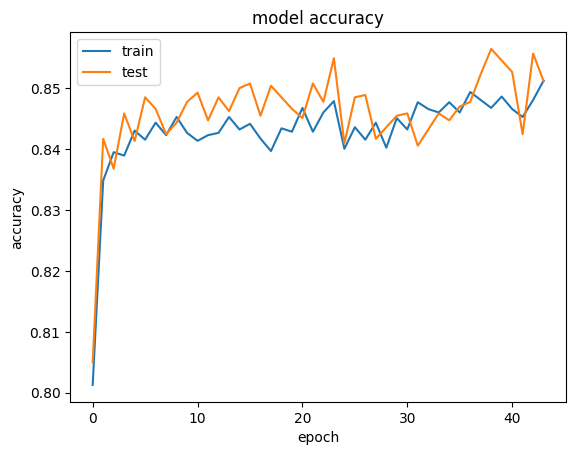

In [134]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

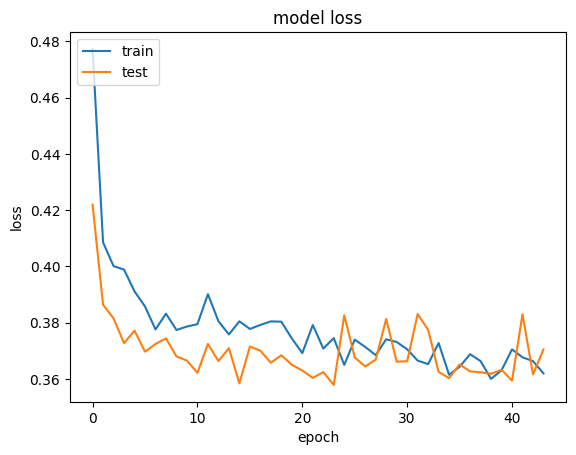

In [135]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
## part-3 making the predictions and evaluating the model

#prediction the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [137]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1547,   48],
       [ 226,  179]])

In [138]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [139]:
score

0.863

In [140]:
## get the weights
classifier.get_weights()

[array([[-3.79403979e-01, -1.51953804e+00,  7.34058857e-01,
          4.62460034e-02,  1.90987095e-01, -1.23848654e-01,
          1.91689637e-02, -5.24603188e-01, -1.66984182e-02,
          1.40112668e-01,  3.75534780e-02],
        [-2.17440200e+00,  4.32311833e-01,  1.28697753e-01,
         -1.50459737e-01,  2.72728467e+00,  1.19474304e+00,
         -4.06159371e-01, -1.57626081e+00, -2.76506424e+00,
          2.22277546e+00,  4.41961378e-01],
        [ 9.56589699e-01,  5.25689721e-01,  3.43137056e-01,
          3.09322570e-02, -1.89709604e-01,  4.66938138e-01,
          1.36083412e+00,  4.55241352e-02,  1.28242359e-01,
         -4.03476566e-01,  4.03328836e-02],
        [ 1.55749011e+00, -3.46943587e-01, -1.88991344e+00,
          1.58132151e-01, -1.24299280e-01, -2.39723134e+00,
          5.62602162e-01, -3.63736689e-01, -5.06621778e-01,
         -7.10299015e-02,  9.28698063e-01],
        [ 6.06739186e-02, -1.52215981e+00,  1.40732145e+00,
          1.49515033e-01,  5.22167534e-02, -